In [2]:
import pandas as pd
import seaborn as sns

In [3]:
titanic = pd.read_csv('train.csv')
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,NaN,S
609,610,1,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,PC 17582,153.4625,C125,S
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S
368,369,1,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.7500,NaN,Q
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,NaN,S


In [4]:
tips = sns.load_dataset('tips')
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
159,16.49,2.00,Male,No,Sun,Dinner,4
192,28.44,2.56,Male,Yes,Thur,Lunch,2
185,20.69,5.00,Male,No,Sun,Dinner,5
75,10.51,1.25,Male,No,Sat,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [6]:
flight = sns.load_dataset('flights')
flight.sample(5)

,year,month,passengers
46,1952,Nov,172
39,1952,Apr,181
121,1959,Feb,342
34,1951,Nov,146
108,1958,Jan,340


In [12]:
iris = sns.load_dataset('iris')
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
61,5.9,3.0,4.2,1.5,versicolor
147,6.5,3.0,5.2,2.0,virginica
66,5.6,3.0,4.5,1.5,versicolor
51,6.4,3.2,4.5,1.5,versicolor
106,4.9,2.5,4.5,1.7,virginica


# (Numerical - Numerical)

### 1.Scatterplot

<Axes: xlabel='total_bill', ylabel='tip'>

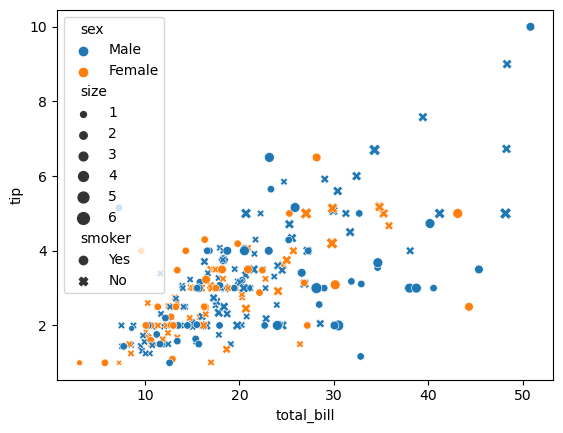

In [11]:
sns.scatterplot(x=tips['total_bill'],y=tips['tip'],hue=tips['sex'],style=tips['smoker'],size=tips['size'])

### 2.Lineplot

In [17]:
groupedByYear = (flight.groupby('year')['passengers']).sum().reset_index()

In [18]:
groupedByYear

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='passengers'>

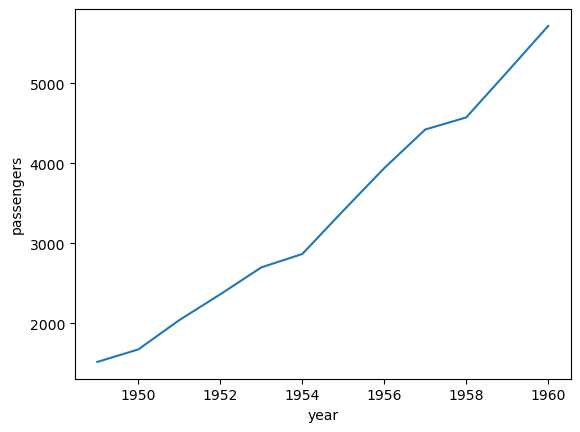

In [20]:
sns.lineplot(x=groupedByYear['year'],y=groupedByYear['passengers'])

# (Numerical - Categorical)

### 3.Bar Plot

<Axes: xlabel='Pclass', ylabel='Age'>

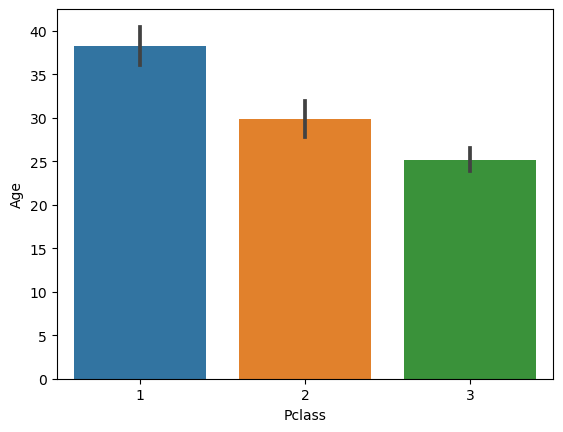

In [21]:
sns.barplot(x=titanic['Pclass'],y=titanic['Age'])

<Axes: xlabel='Pclass', ylabel='Age'>

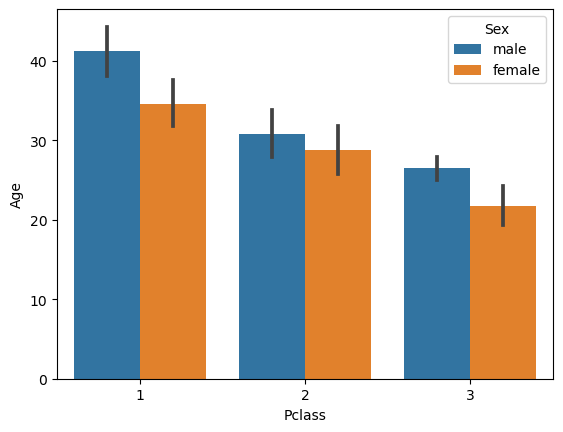

In [22]:
sns.barplot(x=titanic['Pclass'],y=titanic['Age'],hue=titanic['Sex'])

### 4.box Plot

<Axes: xlabel='Sex', ylabel='Age'>

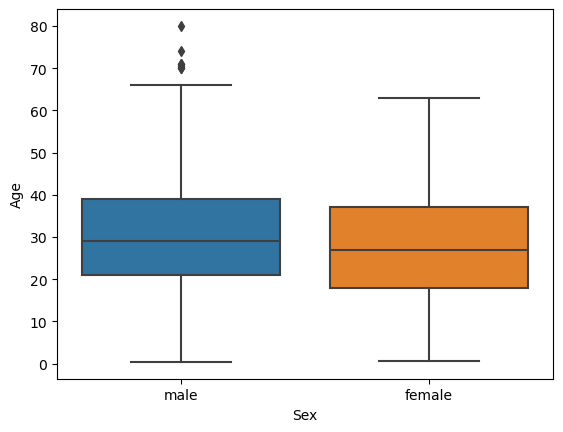

In [23]:
sns.boxplot(x=titanic['Sex'],y=titanic['Age'])

<Axes: xlabel='Sex', ylabel='Age'>

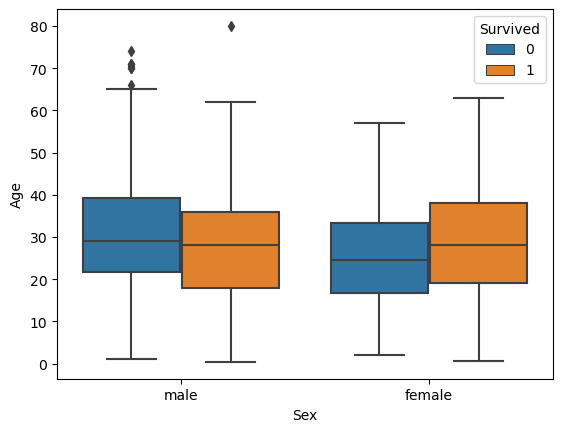

In [24]:
sns.boxplot(x=titanic['Sex'],y=titanic['Age'],hue=titanic['Survived'])

### 5.Distplot

C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_8488\881824492.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=titanic[titanic['Survived'] == 0]['Age'],hist=False)
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\AppData\Local\Temp\ipykernel_8488\881824492.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to 

<Axes: ylabel='Density'>

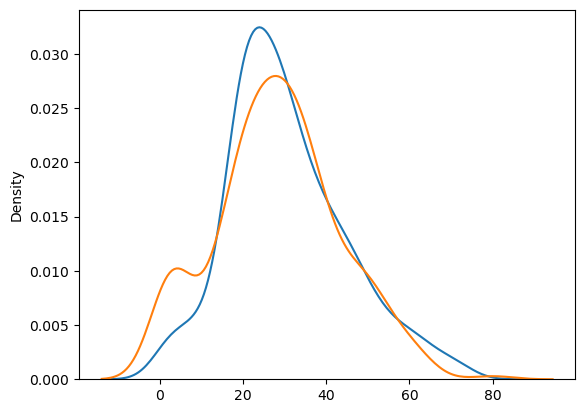

In [28]:
sns.distplot(x=titanic[titanic['Survived'] == 0]['Age'],hist=False)
sns.distplot(x=titanic[titanic['Survived'] == 1]['Age'],hist=False)

# (Categorical - Categorical)

### 6.heatMap

In [29]:
pd.crosstab(titanic['Pclass'],titanic['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Survived', ylabel='Pclass'>

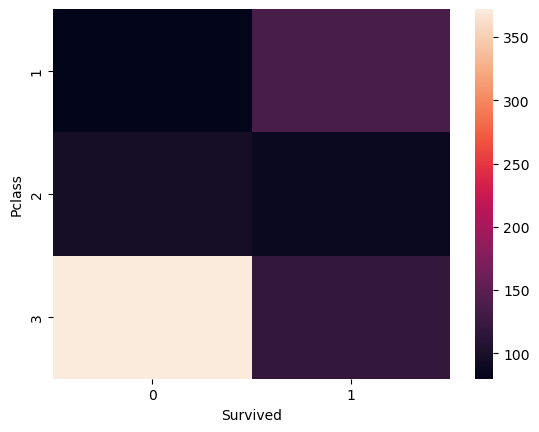

In [30]:
sns.heatmap(pd.crosstab(titanic['Pclass'],titanic['Survived']))

In [33]:
(titanic.groupby('Pclass'))['Survived'].mean()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

<Axes: xlabel='Pclass'>

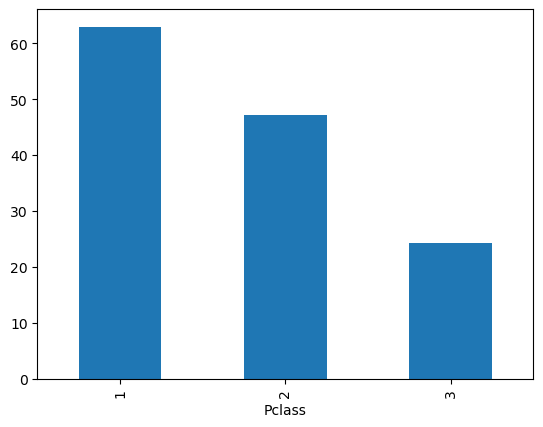

In [34]:
((titanic.groupby('Pclass'))['Survived'].mean()*100).plot(kind='bar')

### 7.ClusterMap

In [35]:
pd.crosstab(titanic['SibSp'],titanic['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


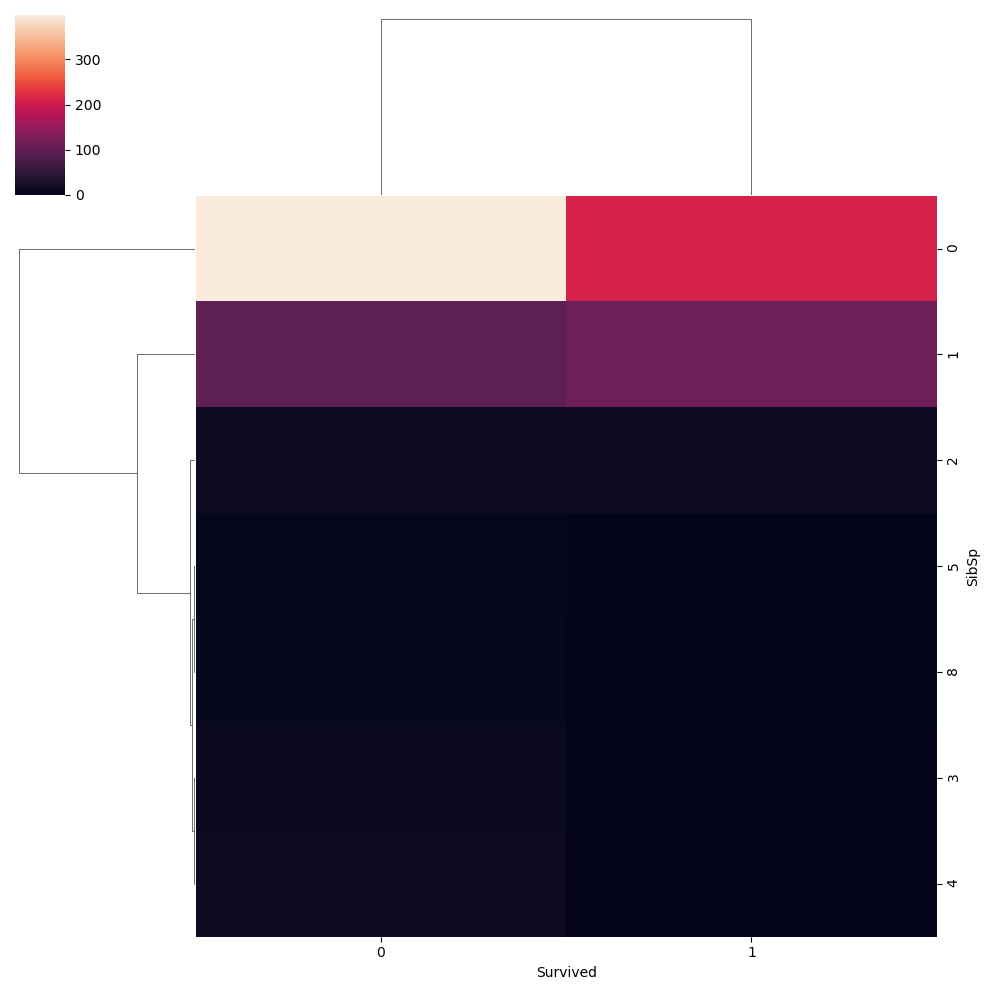

In [36]:
sns.clustermap(pd.crosstab(titanic['SibSp'],titanic['Survived']))

# 8.Pairplot (all numerical)

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

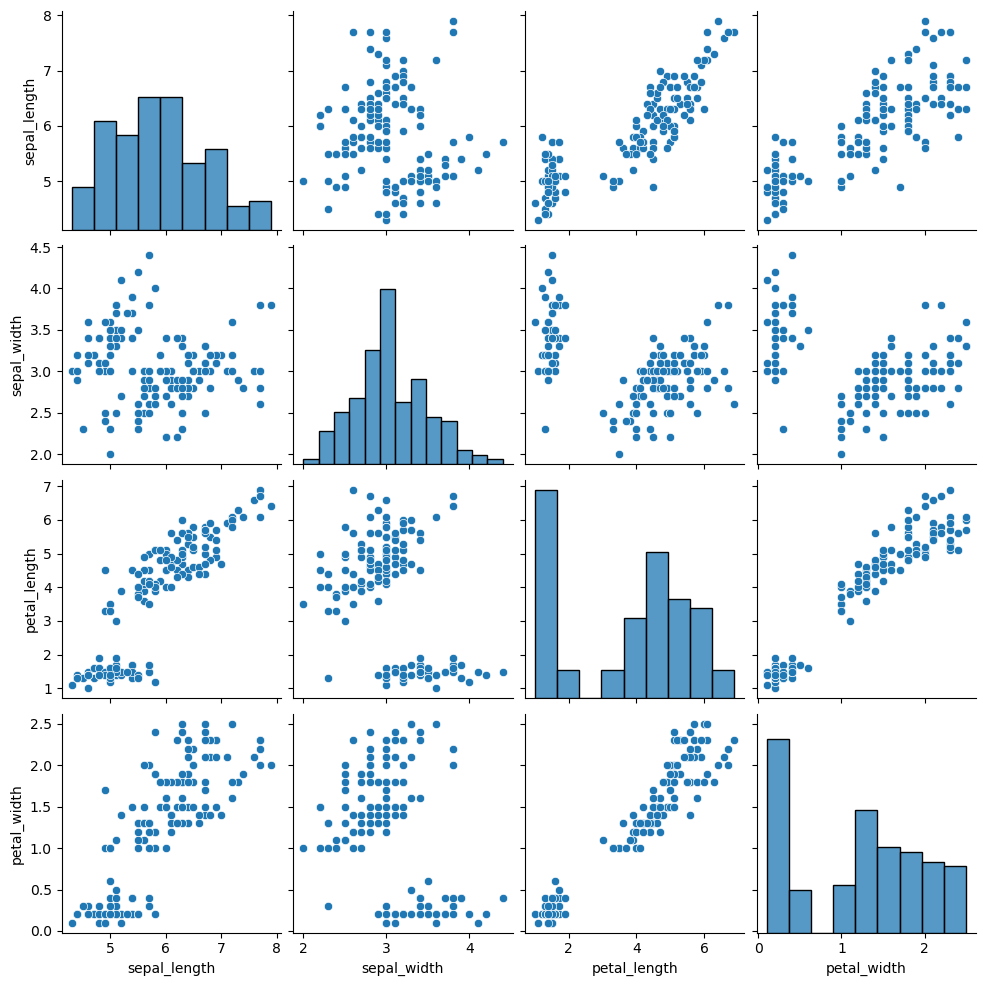

In [37]:
sns.pairplot(iris)